# Multiple variable regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

Here we plot two graphs, for both data variables, in relation to our target variable.

In [2]:
# Generate some data
np.random.seed(10)
m = 30
X = np.random.normal(size=(m, 2))
y = 2 + 3*X[:, 0] + 4*X[:, 1]

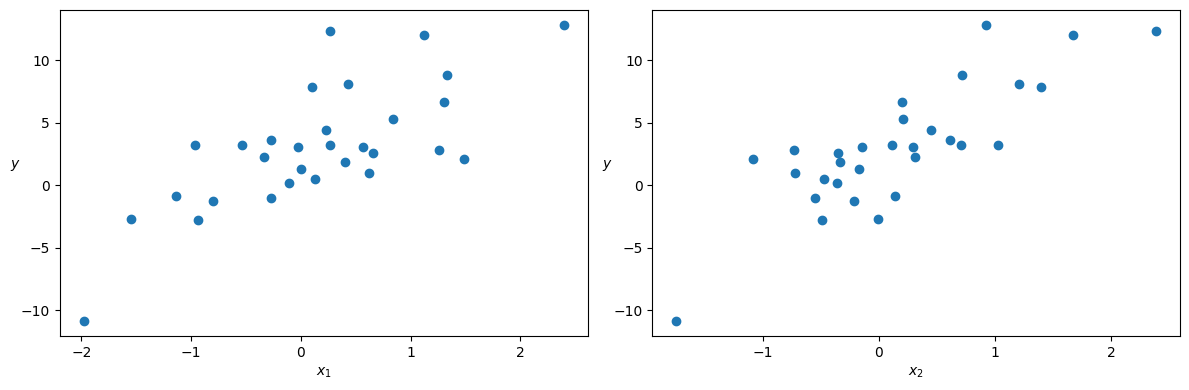

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X[:, 0], y)
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$y$", rotation=0)

ax[1].scatter(X[:, 1], y)
ax[1].set_xlabel("$x_2$")
ax[1].set_ylabel("$y$", rotation=0)

plt.tight_layout()
plt.show()

We notice that it would be difficult to draw a line that could properly represent the relationship between the variables and the target variable. However, if we plot the points in 3D, we can see that the relationship between the variables and the target variable is more linear. This means that we could use multiple regression to model this relationship.

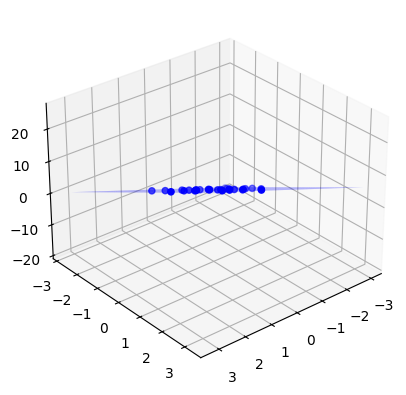

In [7]:
# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a grid of values for the regression plane
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                       np.arange(x2_min, x2_max, 0.2))

# Predict values for the regression plane
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# Plot the regression plane
ax.plot_surface(xx1, xx2, Z, alpha=0.3, color='b')

# Change the viewpoint
ax.view_init(elev=29., azim=50.)

plt.show()

### Key Functions Explained

**np.meshgrid**
- Creates coordinate matrices from coordinate vectors
- Used to create grid points for plotting 3D surfaces
- x = [1, 2]; y = [3, 4]
- X, Y = np.meshgrid(x, y)  # Creates all combinations

**ravel()**
- Flattens multi-dimensional array to 1D array
- Used to reshape data for model predictions
- array_2d = [[1, 2], [3, 4]]
- array_1d = array_2d.ravel()  # [1, 2, 3, 4]

**view_init parameters**
- `elev`: Elevation angle (up/down viewing angle)
- `azim`: Azimuth angle (left/right rotation)
- Controls 3D plot perspective


To find the best parameters for multiple regression, we will use gradient descent. For example, we can observe the evolution of the regression plane based on the changing parameters.

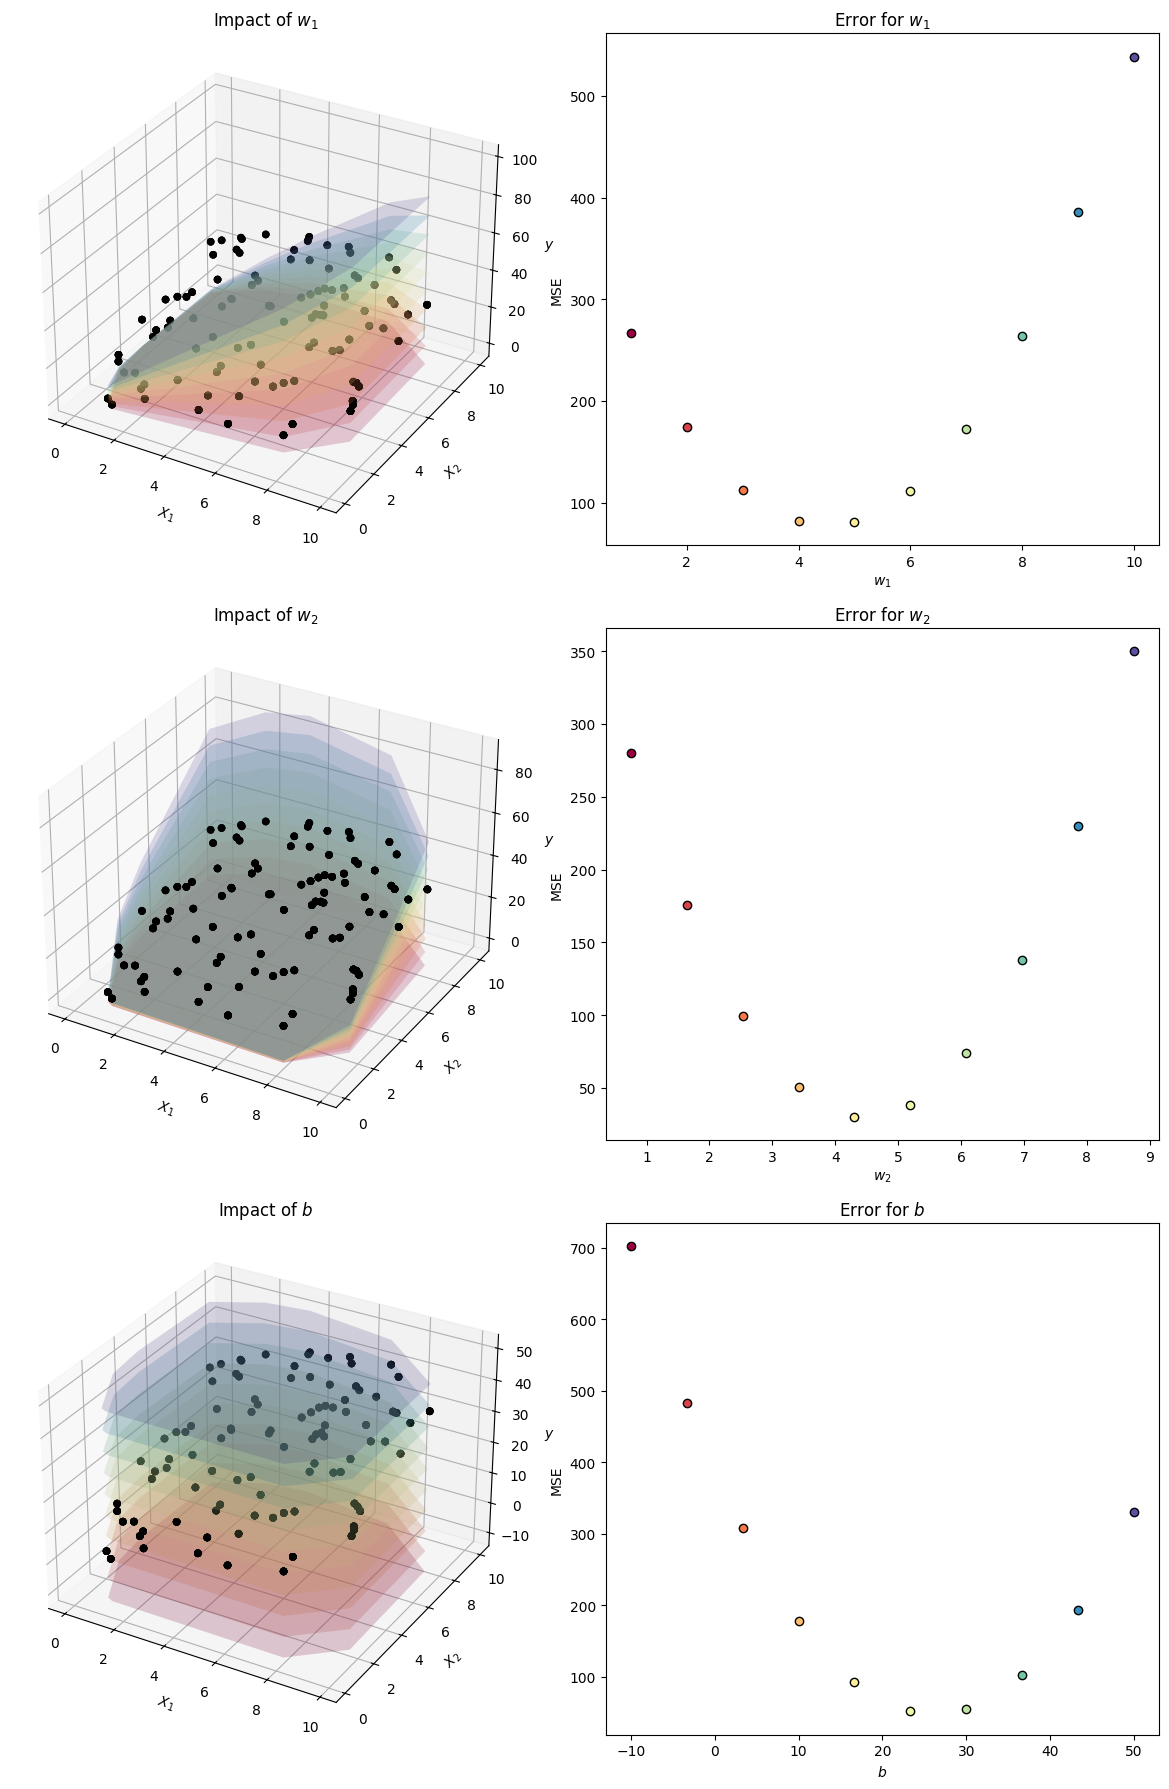

In [8]:
np.random.seed(0)
m = 100
X1 = np.random.rand(m) * 10
X2 = np.random.rand(m) * 10
y = 2 * X1 + 3 * X2 + 1 + np.random.randn(m)
n_linspace = 10

# linear regression model creation
w1, w2, b = 0, 0, 0

# visualize the impact of w1, w2, et b
fig = plt.figure(figsize=(12, 18))

# w1 impact
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322)
list_w1 = np.linspace(1, 10, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_w1))))

for w1 in list_w1:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax1.scatter(X1, X2, y, c='k', zorder=1)
    ax1.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax2.scatter(w1, L, color=c, edgecolor="k")

ax1.set_title('Impact of $w_1$')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.set_zlabel('$y$')
ax2.set_title('Error for $w_1$')
ax2.set_xlabel('$w_1$')
ax2.set_ylabel('MSE')

# linear regression model creation
w1, w2, b = 0, 0, 0

# w2 impact
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324)
list_w2 = np.linspace(0.75, 8.75, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_w2))))

for w2 in list_w2:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax3.scatter(X1, X2, y, c='k', zorder=1)
    ax3.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax4.scatter(w2, L, color=c, edgecolor="k")

ax3.set_title('Impact of $w_2$')
ax3.set_xlabel('$X_1$')
ax3.set_ylabel('$X_2$')
ax3.set_zlabel('$y$')
ax4.set_title('Error for $w_2$')
ax4.set_xlabel('$w_2$')
ax4.set_ylabel('MSE')

# linear regression model creation
w1, w2, b = 0, 0, 0

# b impact
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326)
list_b = np.linspace(-10, 50, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_b))))

for b in list_b:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax5.scatter(X1, X2, y, c='k', zorder=1)
    ax5.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax6.scatter(b, L, color=c, edgecolor="k")

ax5.set_title('Impact of $b$')
ax5.set_xlabel('$X_1$')
ax5.set_ylabel('$X_2$')
ax5.set_zlabel('$y$')
ax6.set_title('Error for $b$')
ax6.set_xlabel('$b$')
ax6.set_ylabel('MSE')

plt.tight_layout()
plt.show()